In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Matplotlib

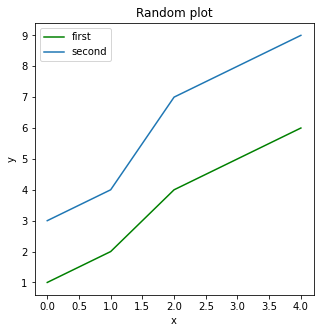

In [2]:
# simple plot/figsize/color/size/title/xlable/ylabel/legend
lst = [1, 2, 4, 5, 6]
lst2 = [3, 4, 7, 8, 9]

plt.figure(figsize=(5,5))

plt.title("Random plot")
plt.xlabel('x')
plt.ylabel('y')

plt.plot(lst, color='green', label='first')
plt.plot(lst2, label='second')
plt.legend()

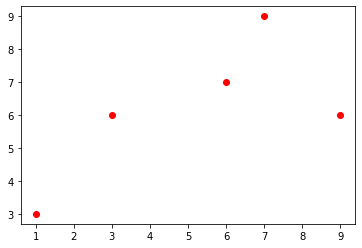

In [3]:
# scatter
x_list = [1, 3, 6, 7, 9]
y_list = [3, 6, 7, 9, 6]

plt.scatter(x_list, y_list, color = 'r')

## Seaborn

In [4]:
# read dataframe
df = pd.read_csv('heart2.csv')
df.head()

Unnamed: 0  age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0           0   63   3       145   233    1        0      150      0      2.3   
1           1   37   2       130   250    0        1      187      0      3.5   
2           2   41   1       130   204    0        0      172      0      1.4   
3           3   56   1       120   236    0        1      178      0      0.8   
4           4   57   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

<AxesSubplot:xlabel='chol', ylabel='thalach'>

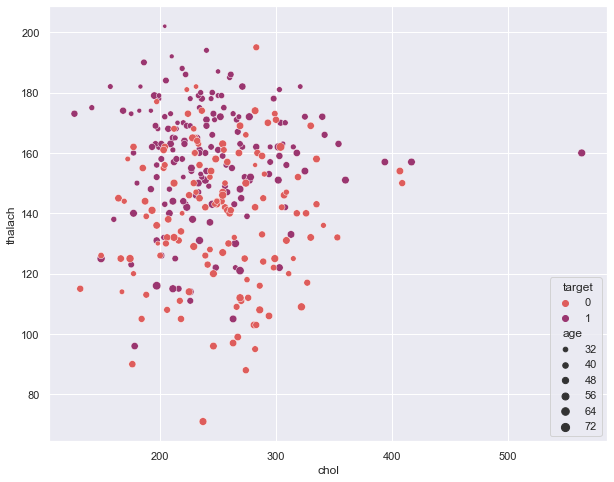

In [5]:
# scatter
sns.set_theme()
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='chol', y='thalach', hue='target', size='age', palette='flare')

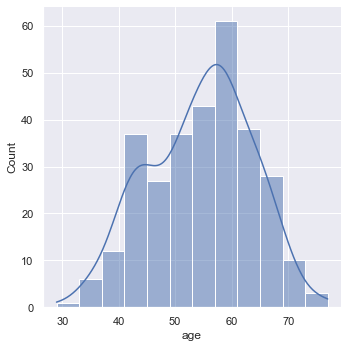

In [6]:
# distplot
sns.displot(df['age'], kde=True)

<AxesSubplot:xlabel='cp', ylabel='count'>

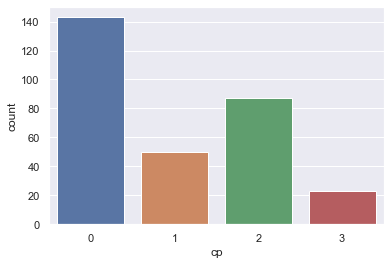

In [8]:
# countplot
sns.countplot(data=df, x='cp')

## Linear Regression from scratch

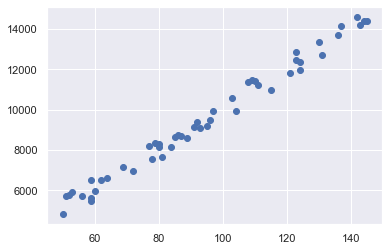

In [10]:
# generate fake data
def gen_price(x):
    return 100 * x + 50

rnd_size = np.random.randint(50, 150, size=(50))
rnd_price = gen_price(rnd_size) + np.random.randint(-600, 600, size=(50))

plt.scatter(rnd_size, rnd_price)


In [11]:
# cat dfs
df1 = pd.DataFrame(rnd_size, columns=['size'])
df2 = pd.DataFrame(rnd_price,  columns=['price'])

df = pd.concat([df1, df2], axis=1)
df.head()

size  price
0   110  11401
1    84   8173
2    50   4805
3    60   5981
4   108  11385

In [16]:
# y = wx + b with init values w0, b0    

class LinearRegressor:
    def __init__(self, learning_rate, n):
        self.learning_rate = learning_rate
        self.n = n
        self.w = 1
        self.b = 0

    def hypothesis_fn(self, feature):
        return self.w * feature + self.b

    def loss_fn(self, pred_y, target):
        return np.sum((pred_y - target) ** 2) / self.n 

    def gd_fn(self, feature, pred_y, target):
        w_prime = np.sum((pred_y - target) * feature) / self.n
        b_prime = np.sum((pred_y - target) * 1) / self.n

        return w_prime, b_prime

    def predict(self, feature):
        return self.w * feature + self.b

    def fit(self, iter, feature, target):
        loss_l = []
        for e in range(iter):
            pred_y = self.hypothesis_fn(feature)
            loss = self.loss_fn(pred_y, target)
            w_prime, b_prime = self.gd_fn(feature, pred_y, target)

            self.w = self.w - self.learning_rate * w_prime
            self.b = self.b - self.learning_rate * b_prime

            loss_l.append(loss)

        return loss_l, self.w, self.b

Text(0, 0.5, 'loss')

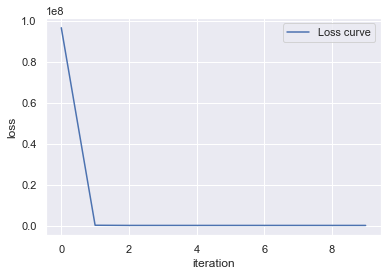

In [22]:
# plot loss
n = 50
alpha = 0.0001
linear_reg = LinearRegressor(learning_rate=alpha, n=n)
loss_lst, w, b = linear_reg.fit(10, feature=df['size'], target=df['price'])

plt.plot(loss_lst, label='Loss curve')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [25]:
# w and b
print(f"Fitted w and b: {w}, {b}")
print(f"True w and b: {100}, {50}")

Fitted w and b: 100.6859610904537, 0.9853173008288356
True w and b: 100, 50


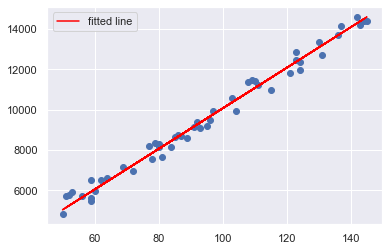

In [27]:
# plot pred
plt.scatter(df['size'], df['price'])
plt.plot(df['size'], linear_reg.predict(df['size']), color= 'red', label='fitted line')
plt.legend()